In [1]:
from pandas import read_csv

In [2]:
from Models.simple_VAE import VAE,loss_function
from sklearn.preprocessing import MinMaxScaler
import argparse
import torch
import torch.utils.data
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image
import matplotlib.pyplot as plt
from time import sleep
import numpy as np
import pandas as pd




# darray = np.loadtxt('data/wine2.csv',delimiter=',')
# scaler = MinMaxScaler()
# scaler.fit(darray)
# dout = scaler.transform(darray)


In [3]:
data = read_csv('data/esg_data_scaled')

In [4]:
data = data.drop('Unnamed: 0',axis=1)

In [5]:
data

,Entity,Name,Year,MSCI Rating,MSCI Environment Score,MSCI Social,MSCI Goverance,Entenched board,Related Party Transactions,Secuities Fraud,...,Total Other Compensation Paid.1,# of CEO and Equiv Changes in FY,# CEO and Equiv Included in Comp,CEO Tenure at Fiscal Year End,Total Comp Paid to CFO and Equiv,Total Compensation Paid.1,Fees Paid in Cash,Stock Awards Granted.1,# of Board Changes in Fiscal Year,# Directors Included in Comp
0,0.113402,0.000000,0.000000,0.333333,0.689130,0.726,0.819792,0.0,0.0,0.0,...,0.006066,0.00,0.2,0.001825,0.030763,0.073736,0.073736,0.000000,0.117647,0.291667
1,0.113402,0.000000,0.090909,0.166667,0.650000,0.773,0.590625,0.0,0.0,0.0,...,0.006471,0.25,0.4,0.000085,0.018150,0.073223,0.073223,0.000000,0.117647,0.291667
2,0.113402,0.000000,0.181818,0.833333,0.444565,0.494,0.484375,0.0,0.0,0.0,...,0.011123,0.00,0.2,0.000582,0.006852,0.073531,0.073531,0.000000,0.058824,0.333333
3,0.113402,0.000000,0.272727,0.000000,0.397826,0.701,0.502083,0.0,0.0,0.0,...,0.007031,0.00,0.2,0.001079,0.018808,0.073223,0.073223,0.001693,0.235294,0.333333
4,0.113402,0.000000,0.363636,0.166667,0.402174,0.640,1.000000,0.0,0.0,0.0,...,0.005750,0.00,0.2,0.001576,0.017164,0.065122,0.065122,0.000000,0.117647,0.291667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,0.969072,0.969072,0.636364,0.333333,1.000000,0.850,0.708333,0.0,0.0,0.0,...,0.008979,0.00,0.2,0.014879,0.270272,0.157317,0.157317,0.007931,0.235294,0.541667
1172,0.969072,0.969072,0.727273,0.333333,1.000000,0.870,0.552083,0.0,0.0,0.0,...,0.009571,0.00,0.2,0.015377,0.218762,0.147267,0.147267,0.007931,0.117647,0.500000
1173,0.969072,0.969072,0.818182,0.333333,1.000000,0.810,0.625000,0.0,0.0,0.0,...,0.009098,0.00,0.2,0.015874,0.090940,0.142139,0.142139,0.011888,0.117647,0.458333
1174,0.969072,0.969072,0.909091,0.333333,1.000000,0.780,0.750000,0.0,0.0,0.0,...,0.007102,0.25,0.4,0.000333,0.049883,0.135477,0.135477,0.006238,0.058824,0.375000


In [6]:
data.to_numpy()[:3,:3]

array([[0.11340206, 0.        , 0.        ],
       [0.11340206, 0.        , 0.09090909],
       [0.11340206, 0.        , 0.18181818]])

In [7]:
darray = data.to_numpy()

In [8]:
for year in data['Year'].unique():
    print(darray[darray[:,2]==year,:].shape)

(98, 232)
(98, 232)
(98, 232)
(98, 232)
(98, 232)
(98, 232)
(98, 232)
(98, 232)
(98, 232)
(98, 232)
(98, 232)
(98, 232)


In [9]:
len(data['Year'].unique())

12

In [10]:
dout = darray
dtensor = torch.FloatTensor(dout)

In [11]:
dtensor[:,2]

tensor([0.0000, 0.0909, 0.1818,  ..., 0.8182, 0.9091, 1.0000])

In [17]:
   #Sending scaled data to device
device = torch.device("cpu")

    


model = VAE(num_feats = 232,latent_dims=100).to(device)

optimizer = optim.Adam(model.parameters(), lr=1e-3)
model.train()

loss_store = []

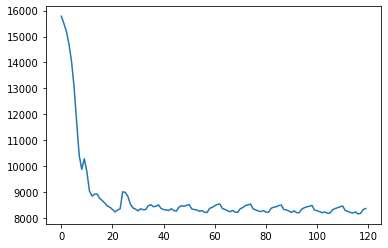

In [18]:
for epoch in range(10): 
    for year in data['Year'].unique():
        
        tensor_in = dtensor[dtensor[:,2]==year,:]
        
        #print(tensor_in.shape)
        
        drecon,mu,log_var =  model(tensor_in)
        optimizer.zero_grad()
        loss = loss_function(drecon, tensor_in, mu, log_var)
        loss.backward()
        optimizer.step()


        loss_store.append(loss.item())

        # if epoch %100 == 0:
       
       
        #     print(loss.item())




    
plt.plot(loss_store)
plt.show()

In [19]:
drecon,mu,log_var =  model(dtensor)

In [16]:
drecon

tensor([[0.5046, 0.5118, 0.5059,  ..., 0.0102, 0.1201, 0.3014],
        [0.5058, 0.4981, 0.5043,  ..., 0.0168, 0.1392, 0.3338],
        [0.5055, 0.5007, 0.5176,  ..., 0.0143, 0.1276, 0.3252],
        ...,
        [0.4978, 0.4967, 0.5196,  ..., 0.0125, 0.1233, 0.3157],
        [0.4979, 0.4935, 0.5183,  ..., 0.0092, 0.1087, 0.2960],
        [0.4959, 0.4998, 0.5084,  ..., 0.0167, 0.1361, 0.3342]],
       grad_fn=<SigmoidBackward>)